In [1]:
import datetime as dt
import pandas as pd
import numpy as np
import yfinance as yf
import pandas_ta as ta
import matplotlib.pyplot as plt
from datetime import datetime,timedelta
tickers ={'jpy': 'JPY%3DX',
        'eur': 'EURUSD%3DX',
        'gbp': 'GBPUSD%3DX',
        'franc': 'CHFUSD%3DX',
        'us100': 'NQ%3DF',
        'us30': 'YM%3DF',
        'us500': 'ES%3DF',
        'crude oil': 'CL%3DF',
        'gold': 'GC%3DF',
        'bitcoin': 'BTC-USD',
        'Apple': 'AAPL',
        'Microsoft': 'MSFT',
        'Google': 'GOOGL',
        'Amazon': 'AMZN',
        'NVIDIA': 'NVDA',
        'Berkshire': 'BRK-B',
        'Meta': 'META',
        'Tesla': 'TSLA',
        'UGI': 'UNH',
        'Exxon': 'XOM',
        'Johnson&Johnson': 'JNJ',
        'Visa': 'V',
        'Procter&Gamble': 'PG',
        'JPMorgan': 'JPM',
        'Mastercard': 'MA',
        'EliLilly': 'LLY',
        'Chevron': 'CVX',
        'HomeDepot': 'HD',
        'Pfizer': 'PFE',
        'AbbVie': 'ABBV',
        'Merck': 'MRK',
        'Pepsi.': 'PEP',
        'Coca-Cola': 'KO',
        'Broadcom': 'AVGO',
        'Costco': 'COST',
        'WaltDisney': 'DIS',
        'Comcast': 'CMCSA',
        'Cisco': 'CSCO',
        'Intel': 'INTC',
        'Salesforce': 'CRM',
        'TexasInstruments ': 'TXN',
        'ThermoFisher ': 'TMO',
        'Bristol-Myers Squibb': 'BMY',
        'Verizon': 'VZ',
        'Nike': 'NKE',
        'Oracle': 'ORCL',
        'NextEra Energy': 'NEE',
        'McDonald ': 'MCD',
        'Adobe': 'ADBE',
        'PhilipMorris ': 'PM',
        'AT&T': 'T',
        'AbbottLaboratories': 'ABT',
        'AdvancedMicro': 'AMD',
        'UnionPacific': 'UNP',
        'Medtronic': 'MDT',
        'CVSHealth': 'CVS',
        'Qualcomm': 'QCOM',
        'Honeywell': 'HON',
        'GoldmanSachs ': 'GS'
    }
#import charts as cr
#cr.stoc('Apple',21)

def get_asset_df(asset_name):
    # asset_name=lower(asset_name)
    asset_map = {
        'jpy': 'JPY%3DX',
        'eur': 'EURUSD%3DX',
        'gbp': 'GBPUSD%3DX',
        'franc': 'CHFUSD%3DX',
        'us100': 'NQ%3DF',
        'us30': 'YM%3DF',
        'us500': 'ES%3DF',
        'crude oil': 'CL%3DF',
        'gold': 'GC%3DF',
        'bitcoin': 'BTC-USD',
        'Apple': 'AAPL',
        'Microsoft': 'MSFT',
        'Google': 'GOOGL',
        'Amazon': 'AMZN',
        'NVIDIA': 'NVDA',
        'Berkshire': 'BRK-B',
        'Meta': 'META',
        'Tesla': 'TSLA',
        'UGI': 'UNH',
        'Exxon': 'XOM',
        'Johnson&Johnson': 'JNJ',
        'Visa': 'V',
        'Procter&Gamble': 'PG',
        'JPMorgan': 'JPM',
        'Mastercard': 'MA',
        'EliLilly': 'LLY',
        'Chevron': 'CVX',
        'HomeDepot': 'HD',
        'Pfizer': 'PFE',
        'AbbVie': 'ABBV',
        'Merck': 'MRK',
        'Pepsi.': 'PEP',
        'Coca-Cola': 'KO',
        'Broadcom': 'AVGO',
        'Costco': 'COST',
        'WaltDisney': 'DIS',
        'Comcast': 'CMCSA',
        'Cisco': 'CSCO',
        'Intel': 'INTC',
        'Salesforce': 'CRM',
        'TexasInstruments ': 'TXN',
        'ThermoFisher ': 'TMO',
        'Bristol-Myers Squibb': 'BMY',
        'Verizon': 'VZ',
        'Nike': 'NKE',
        'Oracle': 'ORCL',
        'NextEra Energy': 'NEE',
        'McDonald ': 'MCD',
        'Adobe': 'ADBE',
        'PhilipMorris ': 'PM',
        'AT&T': 'T',
        'AbbottLaboratories': 'ABT',
        'AdvancedMicro': 'AMD',
        'UnionPacific': 'UNP',
        'Medtronic': 'MDT',
        'CVSHealth': 'CVS',
        'Qualcomm': 'QCOM',
        'Honeywell': 'HON',
        'GoldmanSachs ': 'GS'
    }
    
    if asset_name not in asset_map:
        raise ValueError(f"Asset '{asset_name}' not recognized. Available options are: {', '.join(asset_map.keys())}")
    
    ticker = asset_map[asset_name]
    
    df = yf.download(ticker, start='2000-01-01', end=(datetime.now()+timedelta(days=1)), interval='1d')
    df.columns = df.columns.str.lower()
    columns_to_drop = ['stock splits', 'dividends']
    columns_to_drop = [col for col in columns_to_drop if col in df.columns]
    if columns_to_drop:
        df.drop(columns_to_drop, axis=1, inplace=True)
    df = df.reset_index(level=0)
    df.columns = df.columns.str.lower()
    df['date'] = df['date'].dt.tz_localize('UTC')  
    df['date'] = df['date'].dt.tz_convert(None)
    
    return df


above_volumes=[]
for ticker in tickers.keys():
    stock={}    
    # print(ticker)
    df=get_asset_df(ticker)
    df['vol_mean']=df['volume'].rolling(window=14).mean()
    df['volume'] = df['volume'].astype('int64')
    df.dropna(inplace=True)
    filtered_df = df[(df['volume'] > df['vol_mean']) & (df['date'] > (datetime.now() - timedelta(days=30)))]

    if not filtered_df.empty:
        date = filtered_df['date'].iloc[-1].strftime('%Y-%m-%d')
        close = filtered_df['close'].iloc[-1]
        volume = filtered_df['volume'].iloc[-1]
        vol_mean=filtered_df['vol_mean'].iloc[-1]

        stock = {
            'ticker': ticker,
            'date': date,
            'close': close,
            'volume': volume,
            'vol_mean':vol_mean
        }
        above_volumes.append(stock)

df=pd.DataFrame(above_volumes)
df['volume'] = df['volume'].apply(lambda x: f"{x:,}")
df=df.sort_values(by=['date','volume'],ascending=[False,False])






[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%********

In [2]:
df

,ticker,date,close,volume,vol_mean
5,bitcoin,2024-12-06,99920.710938,"94,534,772,658",6.971299e+10
52,Qualcomm,2024-12-06,159.509995,"9,916,100",8.335207e+06
22,Chevron,2024-12-06,155.240005,"9,697,000",7.068793e+06
13,Tesla,2024-12-06,389.220001,"80,548,300",7.365431e+07
16,Johnson&Johnson,2024-12-06,149.309998,"8,383,800",8.087150e+06
27,Pepsi.,2024-12-06,157.789993,"8,355,900",5.827329e+06
47,AbbottLaboratories,2024-12-06,115.599998,"5,300,300",4.742529e+06
9,Amazon,2024-12-06,227.029999,"44,123,400",3.799078e+07
43,McDonald,2024-12-06,298.980011,"4,157,500",3.067621e+06
48,AdvancedMicro,2024-12-06,138.589996,"33,466,900",2.827741e+07


In [4]:
import smtplib
from email.mime.multipart import MIMEMultipart
from email.mime.text import MIMEText

def send_email(receiver_email, subject, html_body):
    sender_email = "turalaliyev.142002@gmail.com"
    password = ""  "lidi ylth vbrb anpi"

    # Set up the email content
    message = MIMEMultipart()
    message['From'] = sender_email
    message['To'] = receiver_email
    message['Subject'] = subject  

    # Attach the HTML body
    message.attach(MIMEText(html_body, 'html'))

    try:
        server = smtplib.SMTP('smtp.gmail.com', 587)
        server.starttls()
        server.login(sender_email, password)
        server.sendmail(sender_email, receiver_email, message.as_string())
        print("Email sent successfully!")
    except Exception as e:
        print(f"Failed to send email: {e}")
    finally:
        server.quit()

# Convert DataFrame to HTML with inline CSS for styling
html_body = df.to_html(index=False, justify='center', border=0)
html_body = f'''
<html>
<head>
<style>
    body {{
        font-family: Arial, sans-serif;
        color: #333333;
        background-color: #f5f5f5;
    }}
    h3 {{
        color: #2d3748;
        text-align: center;
    }}
    table {{
        width: 100%;
        border-collapse: collapse;
        font-size: 14px;
        background-color: #ffffff;
        border-radius: 5px;
        overflow: hidden;
        box-shadow: 0 4px 8px rgba(0, 0, 0, 0.1);
    }}
    th {{
        background-color: #6c757d;
        color: #ffffff;
        padding: 10px;
        text-align: left;
        font-weight: bold;
    }}
    td {{
        padding: 10px;
        text-align: left;
        white-space: nowrap;
        color: #444444;
    }}
    tr:nth-child(even) {{
        background-color: #f8f9fa;
    }}
    tr:hover {{
        background-color: #e2e6ea;
    }}
    tr:last-child td {{
        border-bottom: none;
    }}
</style>
</head>
<body>
    <h3>Volumes higher than 14 day Mean</h3>
    {html_body}
</body>
</html>
'''

# Send the email with the HTML table
subject = "Stocks Higher than 14 day Mean"
receiver_email = "aliyevtural142002@gmail.com"  
send_email(receiver_email, subject, html_body)

Email sent successfully!


In [6]:
html_body = df.to_html(index=False, justify='center', border=0)
html_body = f'''
<html>
<head>
<style>
    body {{
        font-family: Arial, sans-serif;
        color: #333333;
        background-color: #f5f5f5;
    }}
    h3 {{
        color: #2d3748;
        text-align: center;
    }}
    table {{
        width: 100%;
        border-collapse: collapse;
        font-size: 14px;
        background-color: #ffffff;
        border-radius: 5px;
        overflow: hidden;
        box-shadow: 0 4px 8px rgba(0, 0, 0, 0.1);
    }}
    th {{
        background-color: #6c757d;
        color: #ffffff;
        padding: 10px;
        text-align: left;
        font-weight: bold;
    }}
    td {{
        padding: 10px;
        text-align: left;
        white-space: nowrap;
        color: #444444;
    }}
    tr:nth-child(even) {{
        background-color: #f8f9fa;
    }}
    tr:hover {{
        background-color: #e2e6ea;
    }}
    tr:last-child td {{
        border-bottom: none;
    }}
</style>
</head>
<body>
    <h3>Volumes higher than 14 day Mean</h3>
    {html_body}
</body>
</html>
'''
import asyncio
from telegram import Bot

async def send_telegram_message(bot_token, chat_id, message):
    """
    Sends a message using a Telegram bot.

    Parameters:
        bot_token (str): Telegram bot token from BotFather.
        chat_id (str): Chat ID of the recipient.
        message (str): The message to send.
    """
    try:
        bot = Bot(token=bot_token)
        await bot.send_message(chat_id=chat_id, text=message, parse_mode="HTML")  
        print("Message sent successfully!")
    except Exception as e:
        print(f"Failed to send message: {e}")

# Replace with your bot token and chat ID
BOT_TOKEN = "7435904936:AAEvW8UdCpXQXsLsTl20m_o2rq7s9DqAUok"
CHAT_ID = "1000885863"

# Example message
MESSAGE = html_body

# Use asyncio to send the message
loop = asyncio.get_event_loop()
loop.create_task(send_telegram_message(BOT_TOKEN, CHAT_ID, MESSAGE))





<Task pending name='Task-8' coro=<send_telegram_message() running at C:\Users\user\AppData\Local\Temp\ipykernel_15784\4094107796.py:57>>

Failed to send message: Can't parse entities: unsupported start tag "html" at byte offset 1


In [5]:
import charts as cr

[*********************100%***********************]  1 of 1 completed


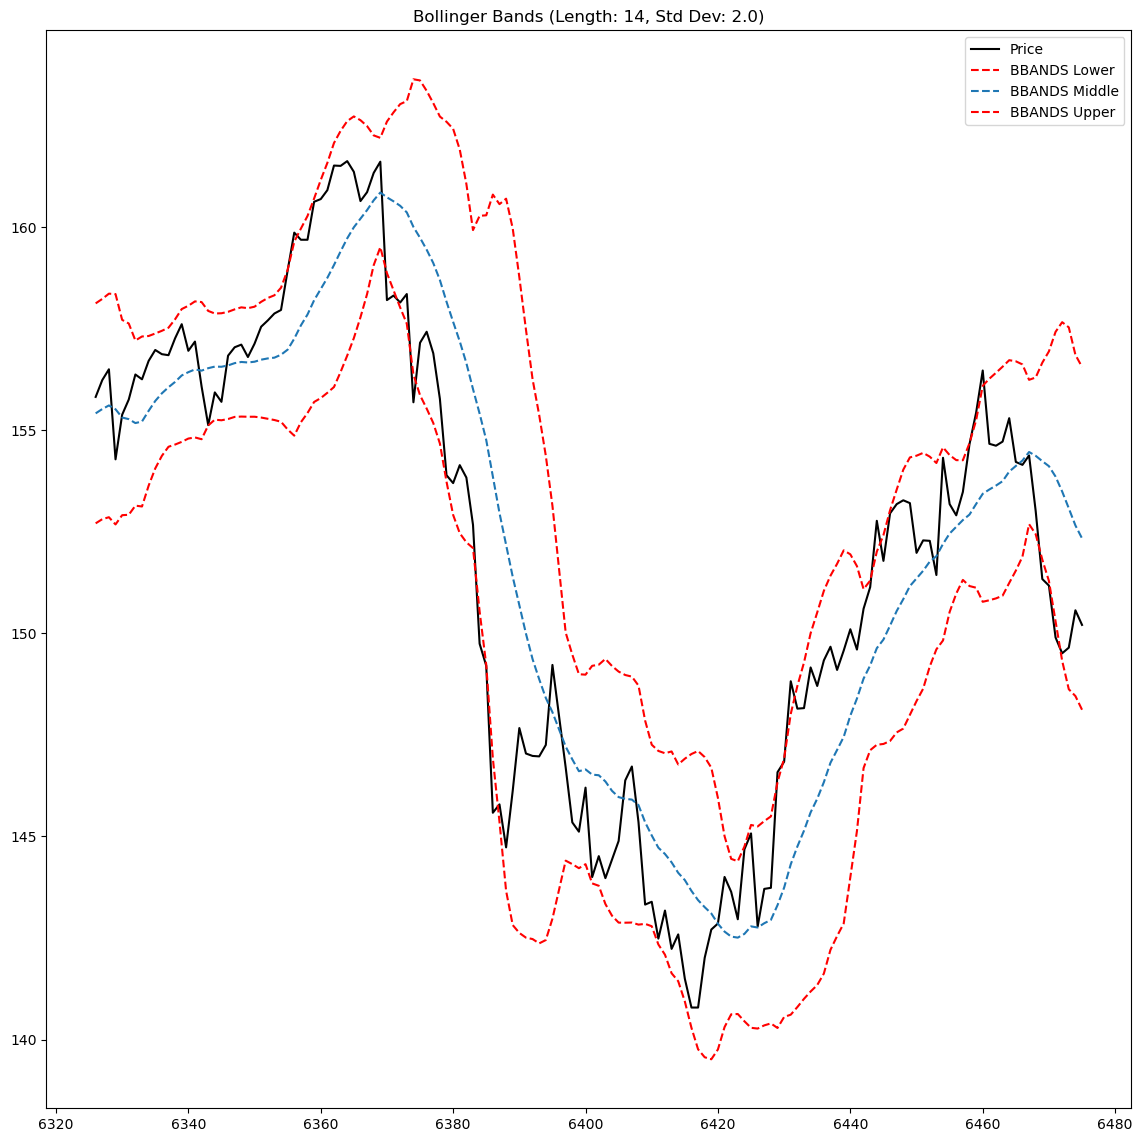

In [9]:
cr.bbands('jpy',14)